In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.optimize as optimize

In [4]:
data = pd.read_csv("data.csv")
data

,t,Cust,PrAlive
0,0,1000,1.000
1,1,631,0.631
2,2,468,0.468
3,3,382,0.382
4,4,326,0.326
5,5,289,0.289
6,6,262,0.262
7,7,241,0.241
8,8,223,0.223
9,9,207,0.207


In [5]:
train_data = data.head()
train_data

,t,Cust,PrAlive
0,0,1000,1.000
1,1,631,0.631
2,2,468,0.468
3,3,382,0.382
4,4,326,0.326


<function matplotlib.pyplot.show(close=None, block=None)>

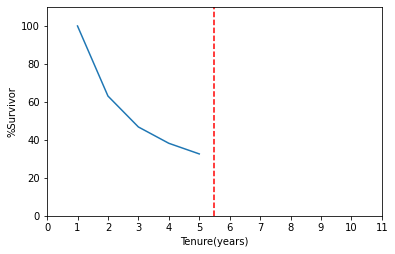

In [6]:
x = train_data.t.values.reshape(-1, 1)
y = train_data.PrAlive.values
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel("Tenure(years)")
ax.set_ylabel("%Survivor")

ax.plot(x+1, y*100)
ax.axvline(x=5.5, color="r", linestyle="--")
ax.axis([0,10,0,110])
ax.set_xticks(np.arange(0,12,1))
plt.show

In [7]:
# Linear
x = train_data.t.values.reshape(-1, 1)
y = train_data.PrAlive.values
regres1 = LinearRegression()
regres1.fit(x, y)
print("y=", round(regres1.intercept_,3), "+(", regres1.coef_[0],")t")
print("R2:", round(regres1.score(x,y), 3))

y= 0.881 +( -0.15970000000000004 )t
R2: 0.869


In [8]:
# Quadratic
x = np.vstack((train_data.t.values, train_data.t.values**2)).T 
y = train_data.PrAlive.values

regres2  = LinearRegression()
regres2.fit(x , y)
print("y=", round(regres2.intercept_, 3), "+(", round(regres2.coef_[0], 3),")t+(", round(regres2.coef_[1], 3),")t2")
print("R2:", round(regres2.score(x,y), 3))

y= 0.981 +( -0.361 )t+( 0.05 )t2
R2: 0.989


In [9]:
# Exponential
x = train_data.t.values.reshape(-1, 1)
y = np.log(train_data.PrAlive.values)

regres3 = LinearRegression()
regres3.fit(x, y)
print("ln(y):", round(regres3.intercept_, 3), "+(", round(regres3.coef_[0], 3),")t")
print("R2:", round(regres3.score(x, y), 3))

ln(y): -0.112 +( -0.274 )t
R2: 0.954


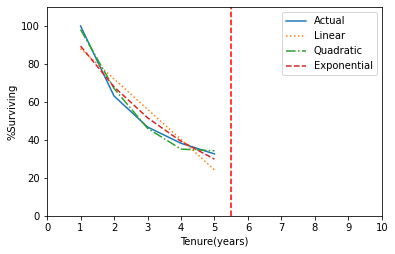

In [10]:
# Linear, exp input
x = train_data.t.values.reshape(-1, 1)
# quad input
x1 = np.vstack((train_data.t.values, train_data.t.values**2)).T

y = train_data.PrAlive.values

fig = plt.figure()
ax=fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel("Tenure(years)")
ax.set_ylabel("%Surviving")
ax.axvline(x=5.5, color="r", linestyle="--")
ax.axis([0,10,0,110])
ax.set_xticks(np.arange(0,11,1.0))

# actual
ax.plot(x+1, 100*y, label="Actual", linestyle="-")

# linear
ax.plot(x+1, 100*regres1.predict(x), label="Linear", linestyle=":")

# quad
ax.plot(x+1, 100*regres2.predict(x1), label="Quadratic", linestyle="-.")

# exp 
ax.plot(x+1, 100*np.exp(regres3.predict(x)), label="Exponential", linestyle="--")

ax.legend(loc="best")
plt.show()

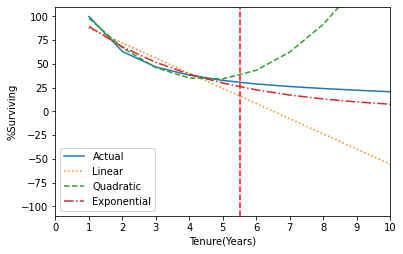

In [11]:
# linear, exp input
x = data.t.values.reshape(-1, 1)
# quad input
x1 = np.vstack((data.t.values, data.t.values**2)).T

y = data.PrAlive.values

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel("Tenure(Years)")
ax.set_ylabel("%Surviving")

ax.axvline(x=5.5, color="r", linestyle="--")
ax.axis([0,10, -110, 110])
ax.set_xticks(np.arange(0,11,1))

# Actual
ax.plot(x+1, 100*y, label="Actual", linestyle="-")

# Linear
ax.plot(x+1, 100*regres1.predict(x), label="Linear", linestyle=":")

# Quad
ax.plot(x+1, 100*regres2.predict(x1), label="Quadratic", linestyle="--")

# Exp
ax.plot(x+1, 100*np.exp(regres3.predict(x)), label="Exponential", linestyle="-.")

ax.legend(loc="best")
plt.show()


In [27]:
def GeoLL(theta, train_data):
    N = len(train_data)
    cust = train_data.Cust.values
    
    lost = np.zeros(N)
    lost[0] = 0
    for k in range(1, N):
        lost[k] = cust[k-1] - cust[k]
        
    p_die = np.zeros(N)
    for k in range(1, N):
        p_die[k] = theta*((1-theta)**(k-1))
                          
    survivors = np.zeros(N)
    survivors[0] = 1
    for k in range(1, N):
        survivors[k] = survivors[k-1] - p_die[k]
    
    LL = 0
    for k in range(1, N):
        LL += np.log(p_die[k])* lost[k]
    LL += np.log(survivors[-1])*cust[-1]
    return -LL

In [33]:
initial_guess = [0.5]
bnds = ((0.001, 0.99),)
result = optimize.minimize(GeoLL, initial_guess, args=(train_data), bounds=bnds)
result.x

array([0.27166464])

In [44]:
prob = result.x[0]
N = 5

p_die = np.zeros(N)
for k in range(1, N):
    p_die[k] = prob*((1-prob)**(k-1))

survivors = np.zeros(N)
survivors[0] = 1
for k in range(1, N):
    survivors[k] = survivors[k-1] - p_die[k]

survivors

array([1.        , 0.72833536, 0.53047239, 0.3863618 , 0.28140096])

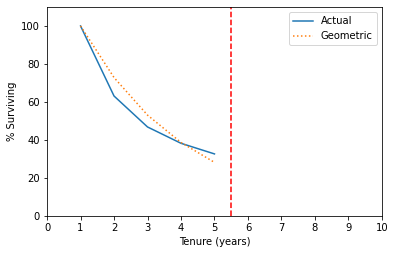

In [46]:
X=train_data.t.values.reshape(-1,1)
y=train_data.PrAlive.values

fig=plt.figure()
ax=fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=5.5,color='r',linestyle='--')
ax.axis([0,10,0,110])
ax.set_xticks(np.arange(0,11,1.0))

#actual
ax.plot(X+1,100*y,label="Actual",linestyle='-')

#geo
ax.plot(X+1,100*survivors,label="Geometric",linestyle=':')
ax.legend(loc='best')
plt.show()

In [49]:
prob1 = result.x[0]
N = 13

p_die1 = np.zeros(N)
for k in range(1 ,N):
    p_die1[k] = prob1*((1-prob1)**(k-1))

survivors1 = np.zeros(N)
survivors1[0] = 1
for k in range(1, N):
    survivors1[k] = survivors1[k-1] - p_die1[k]

survivors1

array([1.        , 0.72833536, 0.53047239, 0.3863618 , 0.28140096,
       0.20495427, 0.14927544, 0.10872258, 0.0791865 , 0.05767433,
       0.04200625, 0.03059464, 0.02228316])

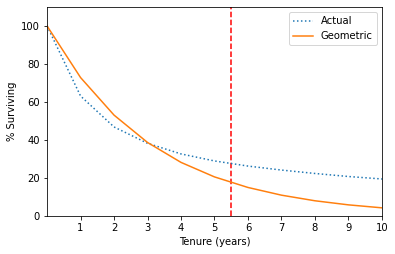

In [59]:
x = data.t.values.reshape(-1, 1)
y = data.PrAlive.values

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')

ax.axvline(x=5.5, color="r", linestyle="--")
ax.axis(([0, 10, 0, 110]))
ax.set_xticks(np.arange(1, 11, 1))

# actual
ax.plot(x, 100*y, label="Actual", linestyle=":")

ax.plot(x, 100*survivors1, label="Geometric", linestyle="-")

ax.legend(loc="best")
plt.show()